# <center> <b> CLUSTERING ALGORITHM </b> </center>

### Problem Statement:
The problem revolves around clustering the Iris flower dataset without utilizing the species labels. The primary challenge is to group the samples based solely on their morphological features: Sepal Length, Sepal Width, Petal Length, and Petal Width. The objective is to employ clustering techniques to identify natural groupings or patterns within the dataset, facilitating a deeper understanding of the underlying structure and relationships among the samples.

### Objective:
The objective is to explore clustering methodologies on the Iris flower dataset, aiming to uncover inherent patterns or clusters based on the morphological attributes of the flowers. Specifically, the goals are:

Utilize clustering algorithms such as K-means clustering, hierarchical clustering to partition the dataset into clusters based on feature similarities.
Assess the quality of clustering results using evaluation metrics like silhouette score to determine the optimal number of clusters.


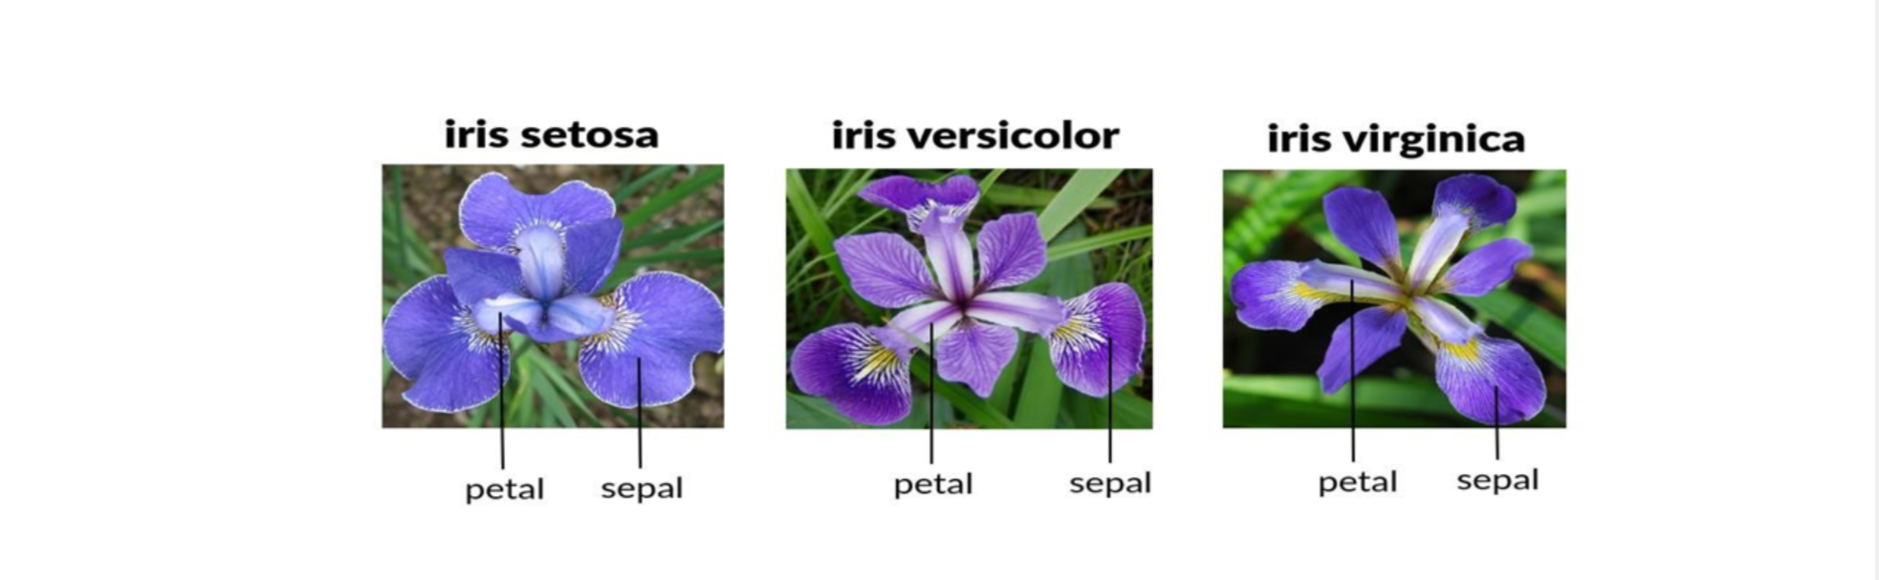

### Importing necessary libraries

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math
import sklearn
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

### Ignore warnings

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Data Loading

In [3]:
# Load the Iris dataset
iris_data = load_iris()

In [4]:
#The features (input data) of the Iris dataset, containing measurements of sepal length, sepal width, petal length, and petal width
iris_data.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [5]:
#The target labels (output data) of the Iris dataset, representing the species of each sample.
iris_data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
# Create a DataFrame
df = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)

# Add the target variable 'species' to the DataFrame
df['class'] = iris_data.target

# Display the DataFrame
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### EDA

In [7]:
#Display the first few rows of the dataset
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
#Display the last few rows of the dataset
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [9]:
#Display concise summary of a DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   class              150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [10]:
# Display statistical summary for all columns within the dataFram
df.describe(include='all')

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [11]:
#To check if there are any missing values in dataset
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
class                0
dtype: int64

In [12]:
#To check if there are any missing values in dataset
df.notnull().sum()

sepal length (cm)    150
sepal width (cm)     150
petal length (cm)    150
petal width (cm)     150
class                150
dtype: int64

#### Checking for Duplicates

In [13]:
#To check if there are any duplicates in dataset
df.duplicated().sum()

1

#### Check the Shape of Dataset

In [14]:
#To check the shape of a DataFrame df
df.shape

(150, 5)

In [15]:
## Access column names
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'class'],
      dtype='object')

### Data Preprocessing

In [16]:
# Dropping Duplicates
df=df.drop_duplicates()
df=df.reset_index(drop=True)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,2
145,6.3,2.5,5.0,1.9,2
146,6.5,3.0,5.2,2.0,2
147,6.2,3.4,5.4,2.3,2


In [17]:
# Find unique values in the 'class' column
df['class'].unique()

array([0, 1, 2])

In [18]:
# Group by 'class' column and count occurrences of each class
df.groupby('class').size()

class
0    50
1    50
2    49
dtype: int64

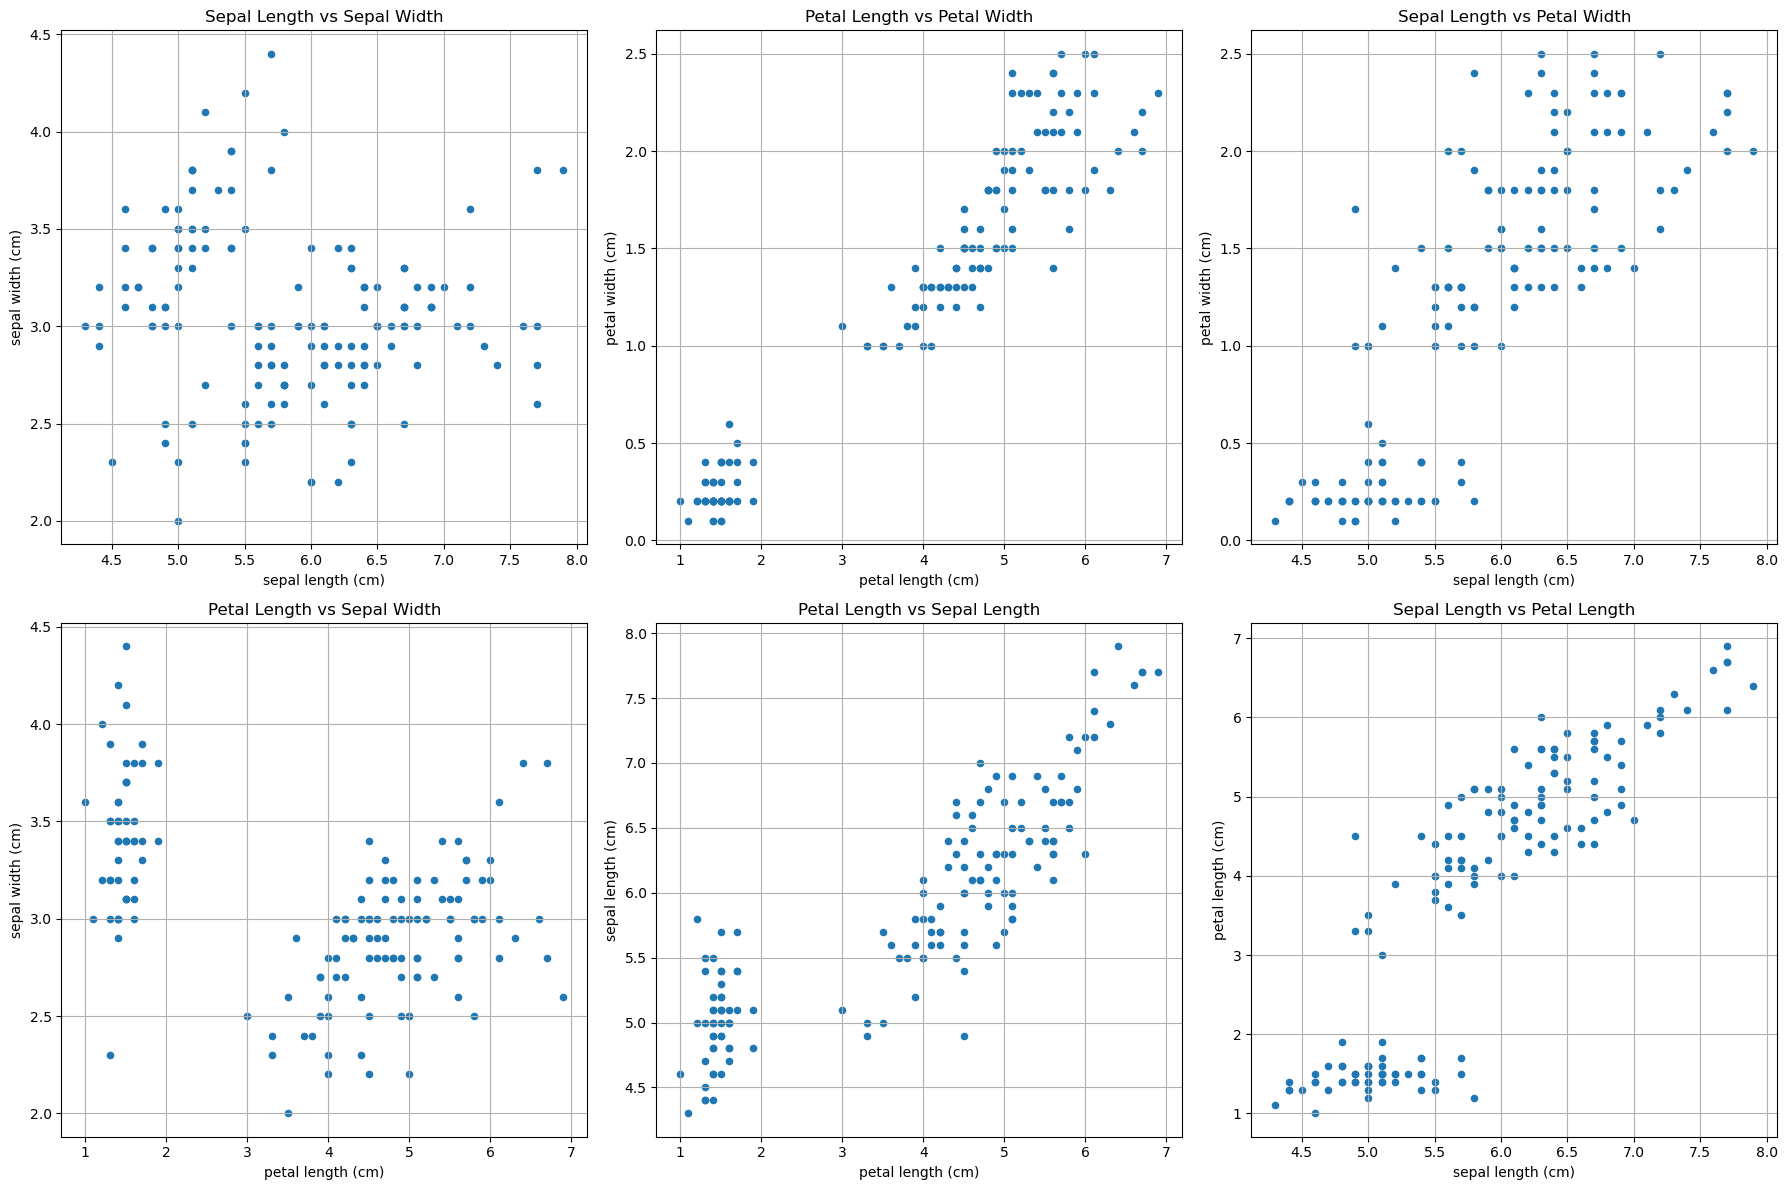

In [19]:
# Create a figure and a 2x3 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))

# Plot 1: Sepal length vs. Sepal width
df.plot(kind='scatter', x='sepal length (cm)', y='sepal width (cm)', ax=axes[0, 0])
axes[0, 0].set_title('Sepal Length vs Sepal Width')
axes[0, 0].grid()

# Plot 2: Petal length vs. Petal width
df.plot(kind='scatter', x='petal length (cm)', y='petal width (cm)', ax=axes[0, 1])
axes[0, 1].set_title('Petal Length vs Petal Width')
axes[0, 1].grid()

# Plot 3: Sepal length vs. Petal width
df.plot(kind='scatter', x='sepal length (cm)', y='petal width (cm)', ax=axes[0, 2])
axes[0, 2].set_title('Sepal Length vs Petal Width')
axes[0, 2].grid()

# Plot 4: Petal length vs. Sepal width
df.plot(kind='scatter', x='petal length (cm)', y='sepal width (cm)', ax=axes[1, 0])
axes[1, 0].set_title('Petal Length vs Sepal Width')
axes[1, 0].grid()

# Plot 5: Petal length vs. Sepal length
df.plot(kind='scatter', x='petal length (cm)', y='sepal length (cm)', ax=axes[1, 1])
axes[1, 1].set_title('Petal Length vs Sepal Length')
axes[1, 1].grid()

# Plot 6: Sepal length vs. Petal length
df.plot(kind='scatter', x='sepal length (cm)', y='petal length (cm)', ax=axes[1, 2])
axes[1, 2].set_title('Sepal Length vs Petal Length')
axes[1, 2].grid()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


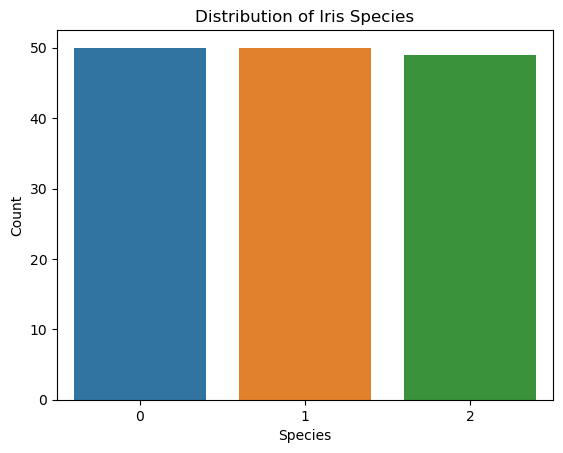

In [20]:
# Create a count plot for the target column 'class'
sns.countplot(x='class', data=df)
plt.title('Distribution of Iris Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()

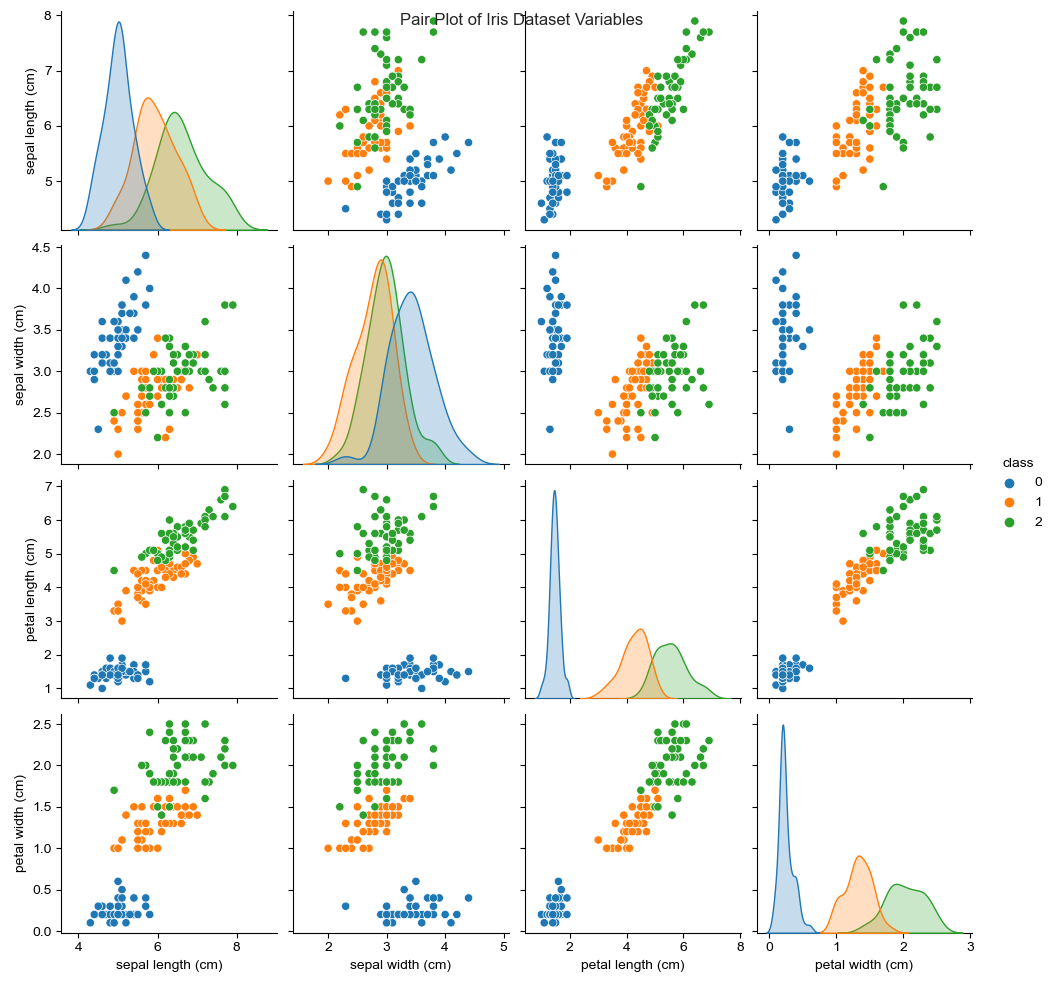

In [21]:
#create a pair plot
sns.pairplot(df,hue='class', palette='tab10')
sns.set_style("whitegrid")
plt.suptitle("Pair Plot of Iris Dataset Variables")
plt.show()

The pair plot offers a comprehensive visual overview of the relationships between different pairs of variables (features) in the Iris dataset. Each scatterplot within the grid represents the relationship between two specific variables, such as sepal length, sepal width, petal length, and petal width. The data points in these scatterplots are color-coded based on the species of the iris flower, allowing for easy differentiation and comparison among the three species: Setosa, Versicolour, and Virginica. This visualization helps in identifying patterns, correlations, and potential separations between species based on their morphological features. It also highlights the distinct clusters formed by each species, providing insights into how well the features discriminate between the different iris types. Overall, the pair plot is an effective tool for exploratory data analysis, facilitating a deeper understanding of the dataset's structure and the relationships between its variables.








In [22]:
# Select column names with float64 data type
col_name = df.select_dtypes("float64").columns
col_name 

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

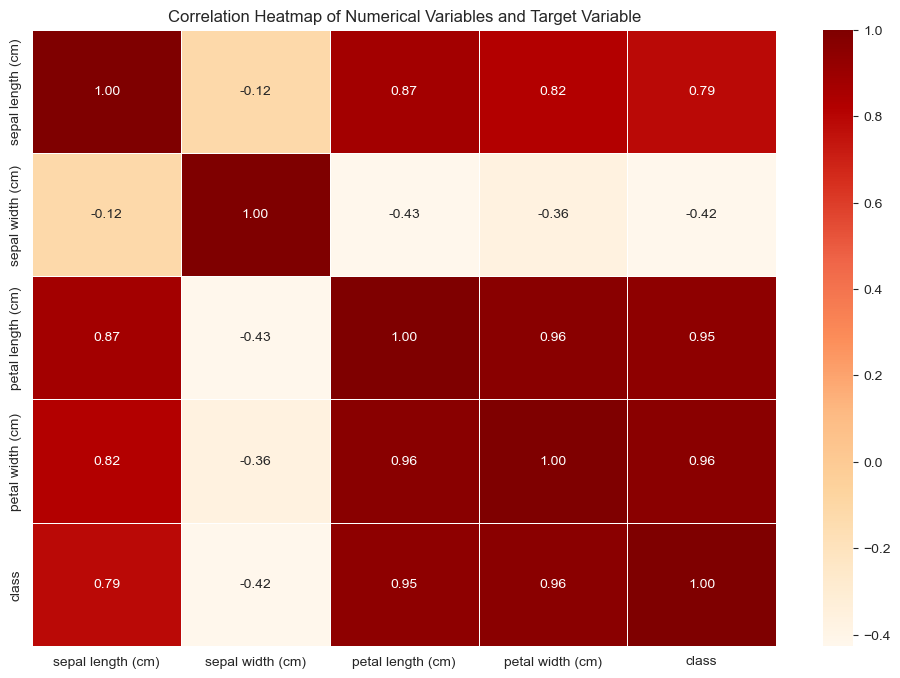

In [23]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='OrRd', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Variables and Target Variable')
plt.show()

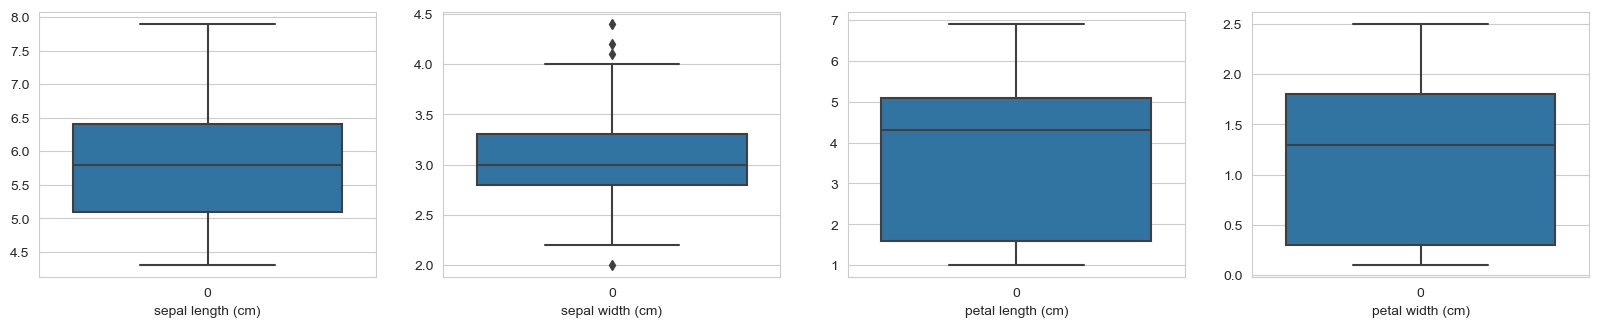

In [24]:
#providing distribution and spread of feature
fig = plt.figure(figsize=(20,20))
counter = 0

for col in col_name:
    fig.add_subplot(5,4,counter+1)
    sns.boxplot(data=df[col])
    plt.xlabel(col)
    counter = counter + 1

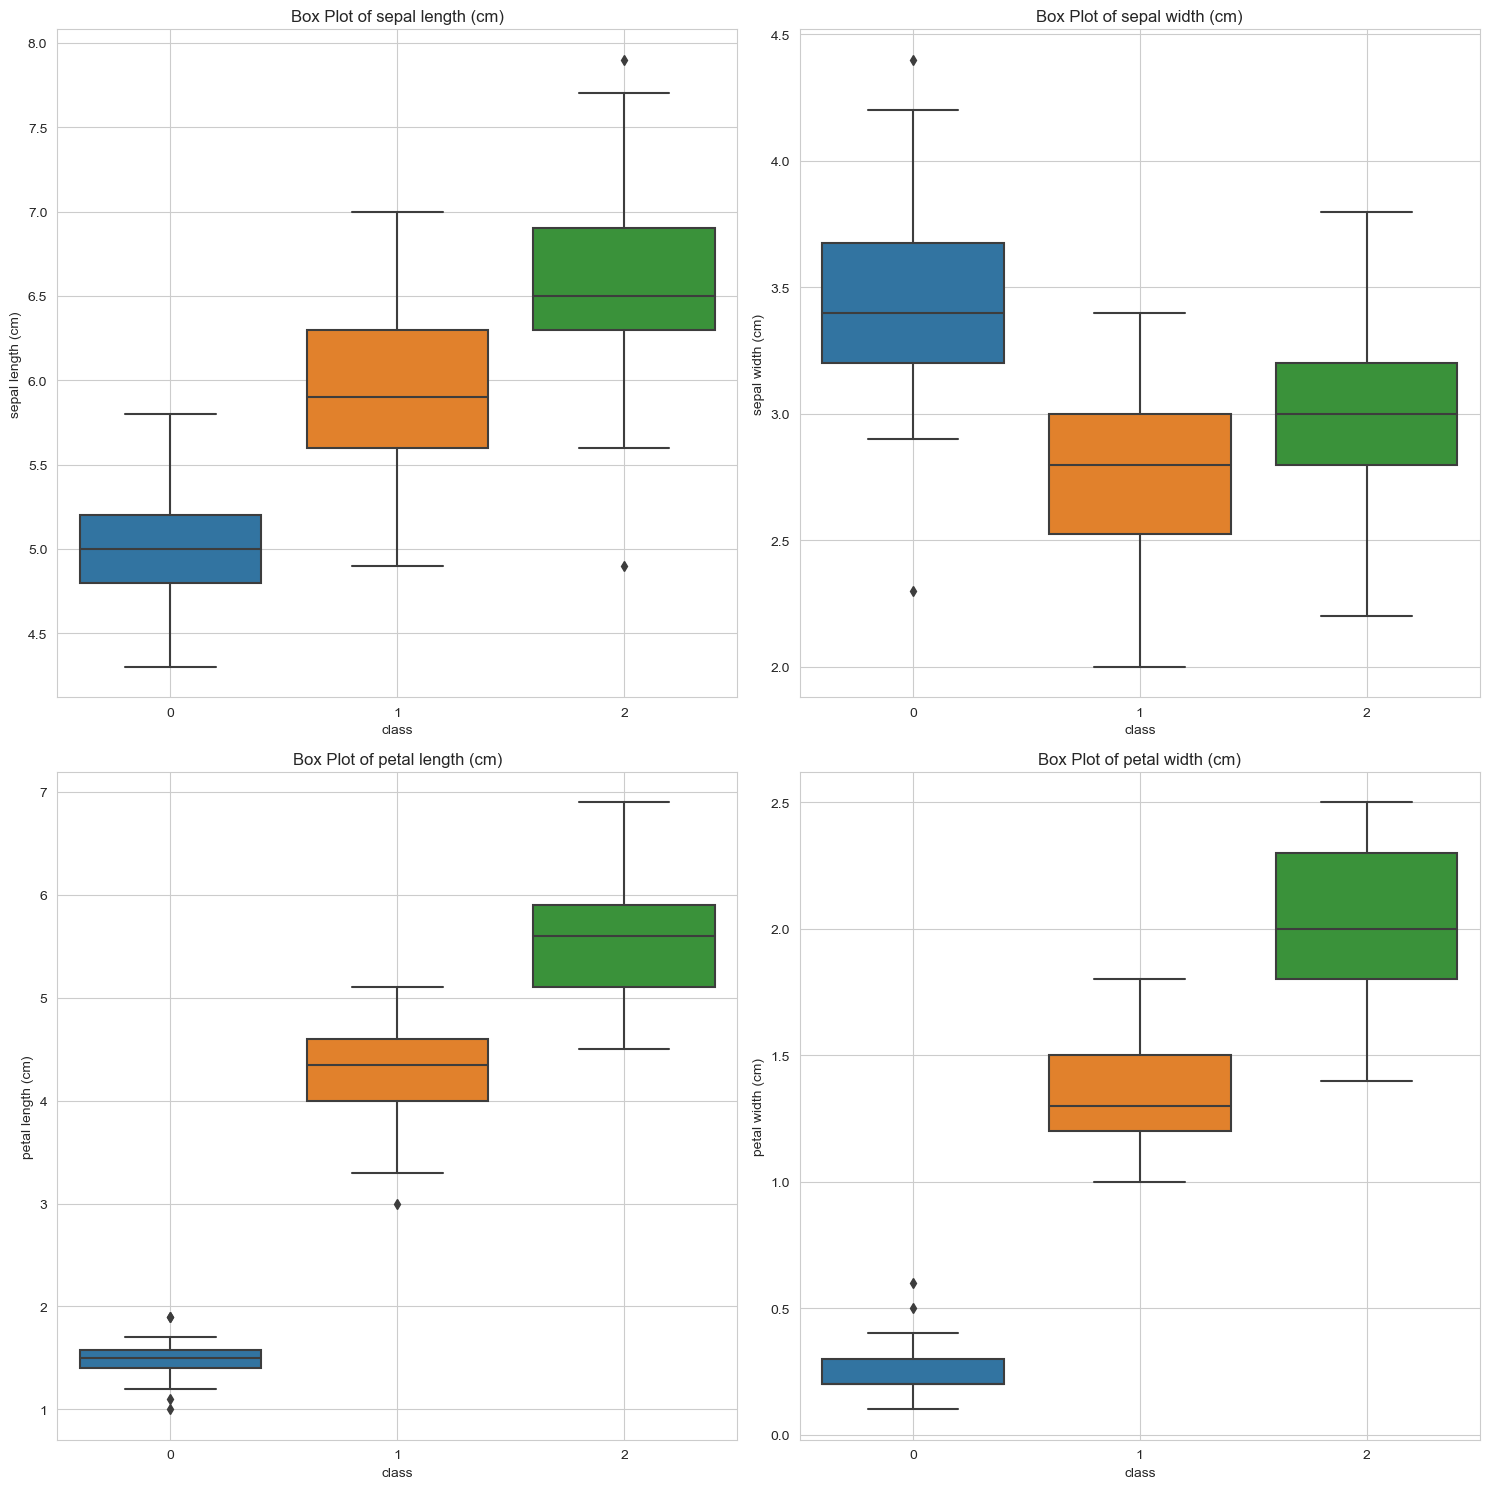

In [25]:
#creates a box plot for each feature
fig, axes = plt.subplots(2, 2, figsize=(15,15))
for i, col in enumerate(col_name):
    sns.boxplot(data=df, x='class', y=col, ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(f'Box Plot of {col}')
    axes[i // 2, i % 2].grid(True)
plt.tight_layout()
plt.show()

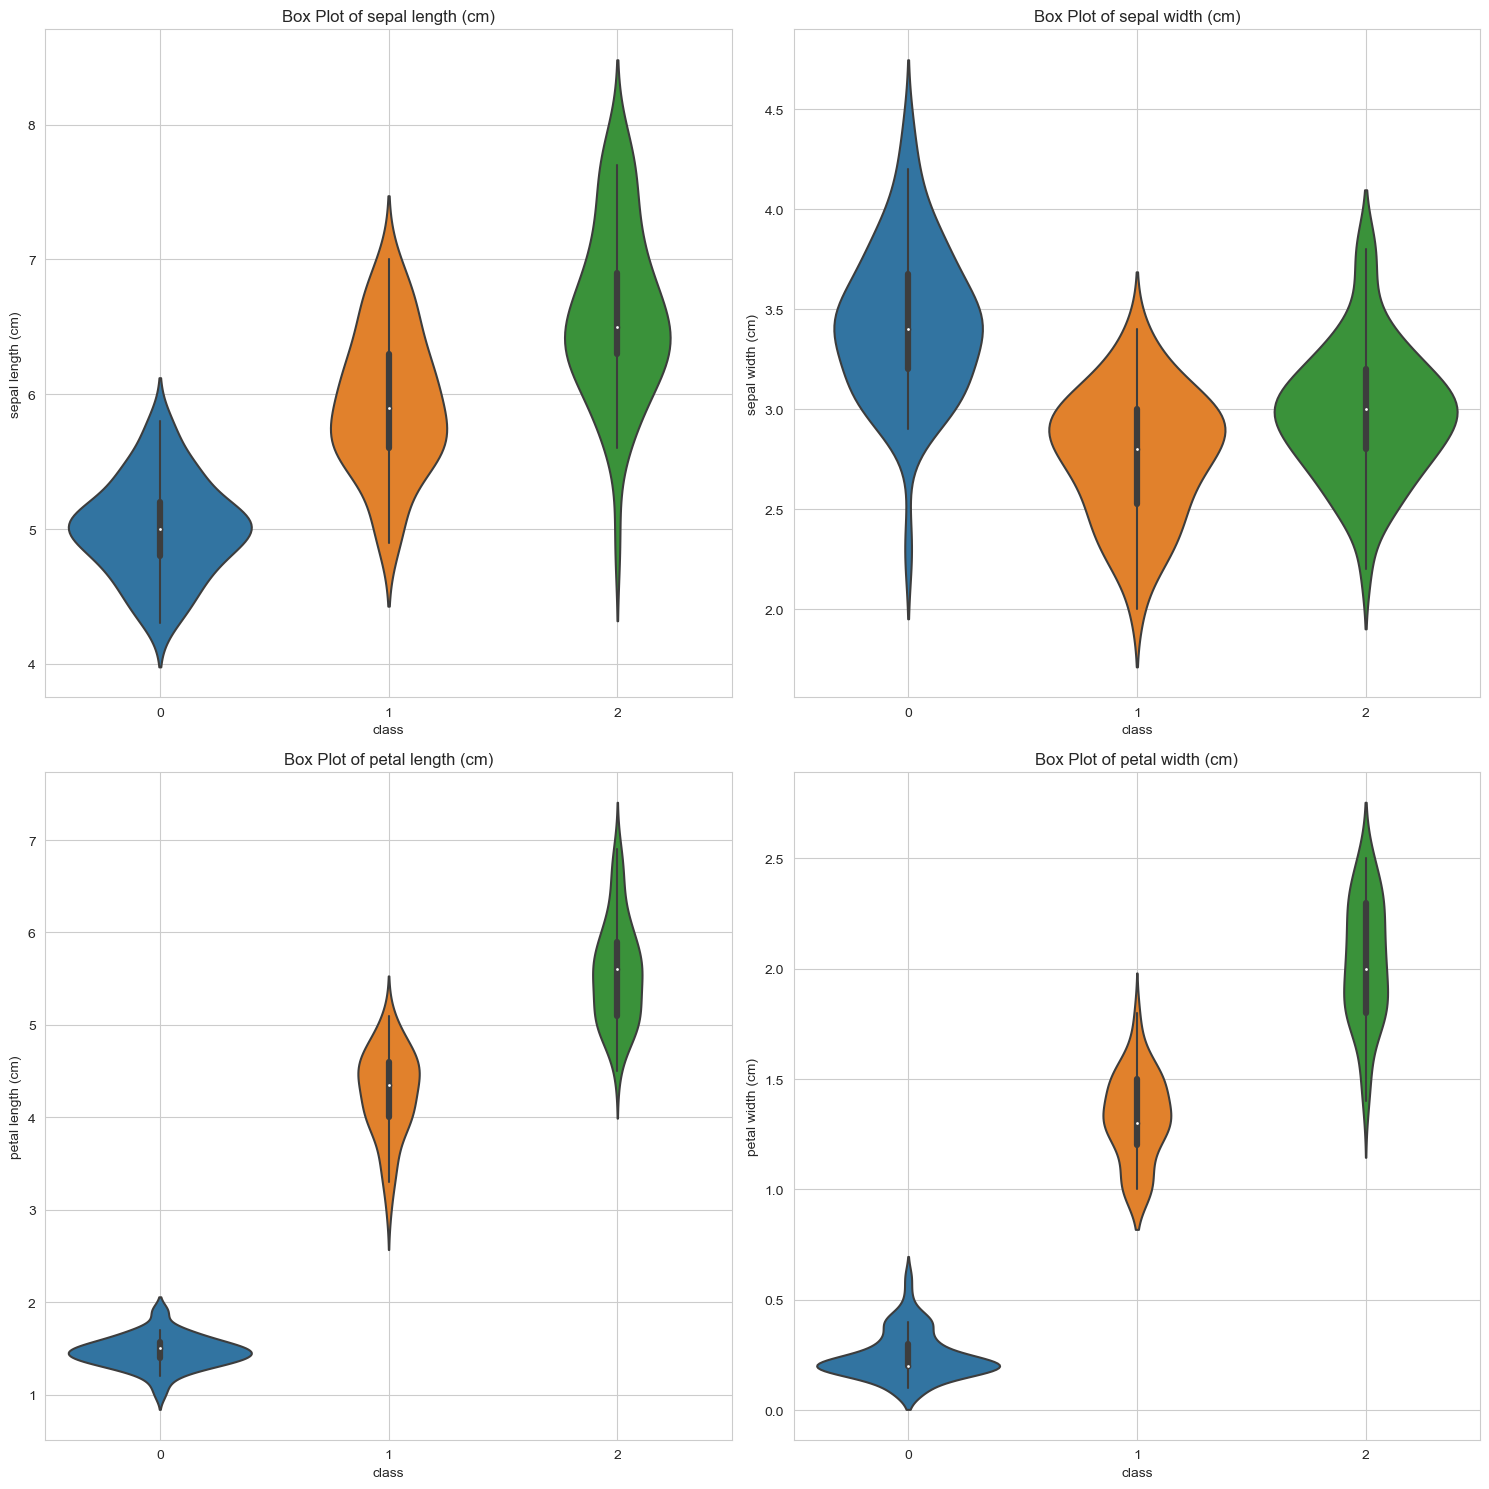

In [26]:
#creates a violin plot for each feature
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
for i, col in enumerate(col_name):
    sns.violinplot(data=df, x='class', y=col, ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(f'Box Plot of {col}')
    axes[i // 2, i % 2].grid(True)
plt.tight_layout()
plt.show()

### Outlier Treatment

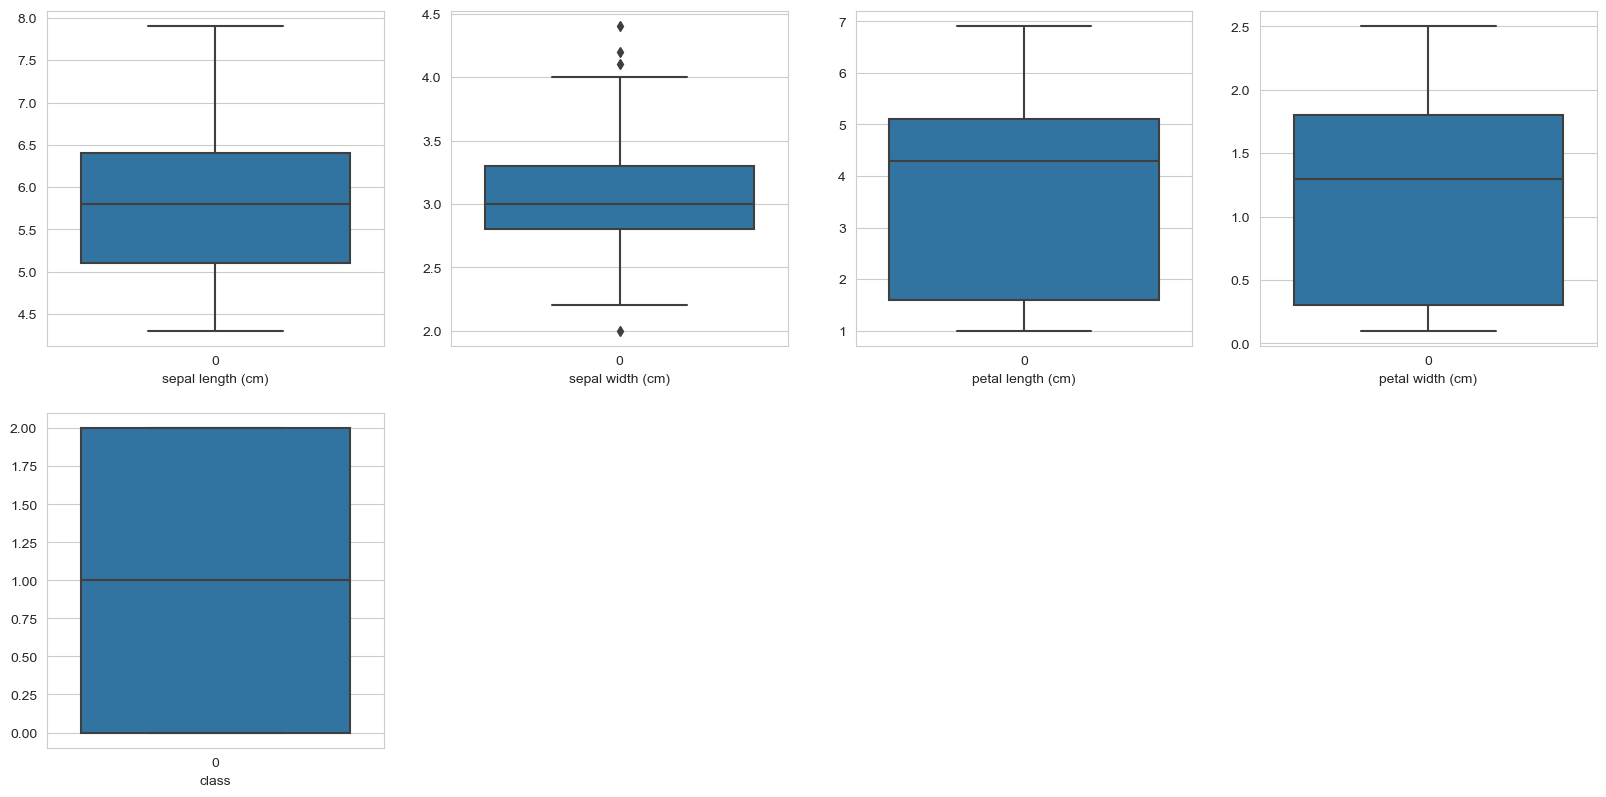

In [27]:
#box plot to identify outliers
fig = plt.figure(figsize=(20,20))
counter = 0

for col in df.select_dtypes(include="number").columns:
    fig.add_subplot(4,4,counter+1)
    sns.boxplot(data=df[col])
    plt.xlabel(col)
    counter = counter + 1

In [28]:
def whisker(col):
    q1,q3=np.percentile(col,[25,75])
    iqr=q3-q1
    lw=q1-1.5*iqr
    uw=q3+1.5*iqr
    return lw,uw

In [29]:
#removing outliers using capping
for i in df.select_dtypes(include="number").columns:
    lw,uw=whisker(df[i])
    df[i]=np.where(df[i]<lw,lw,df[i])
    df[i]=np.where(df[i]>uw,uw,df[i]) 

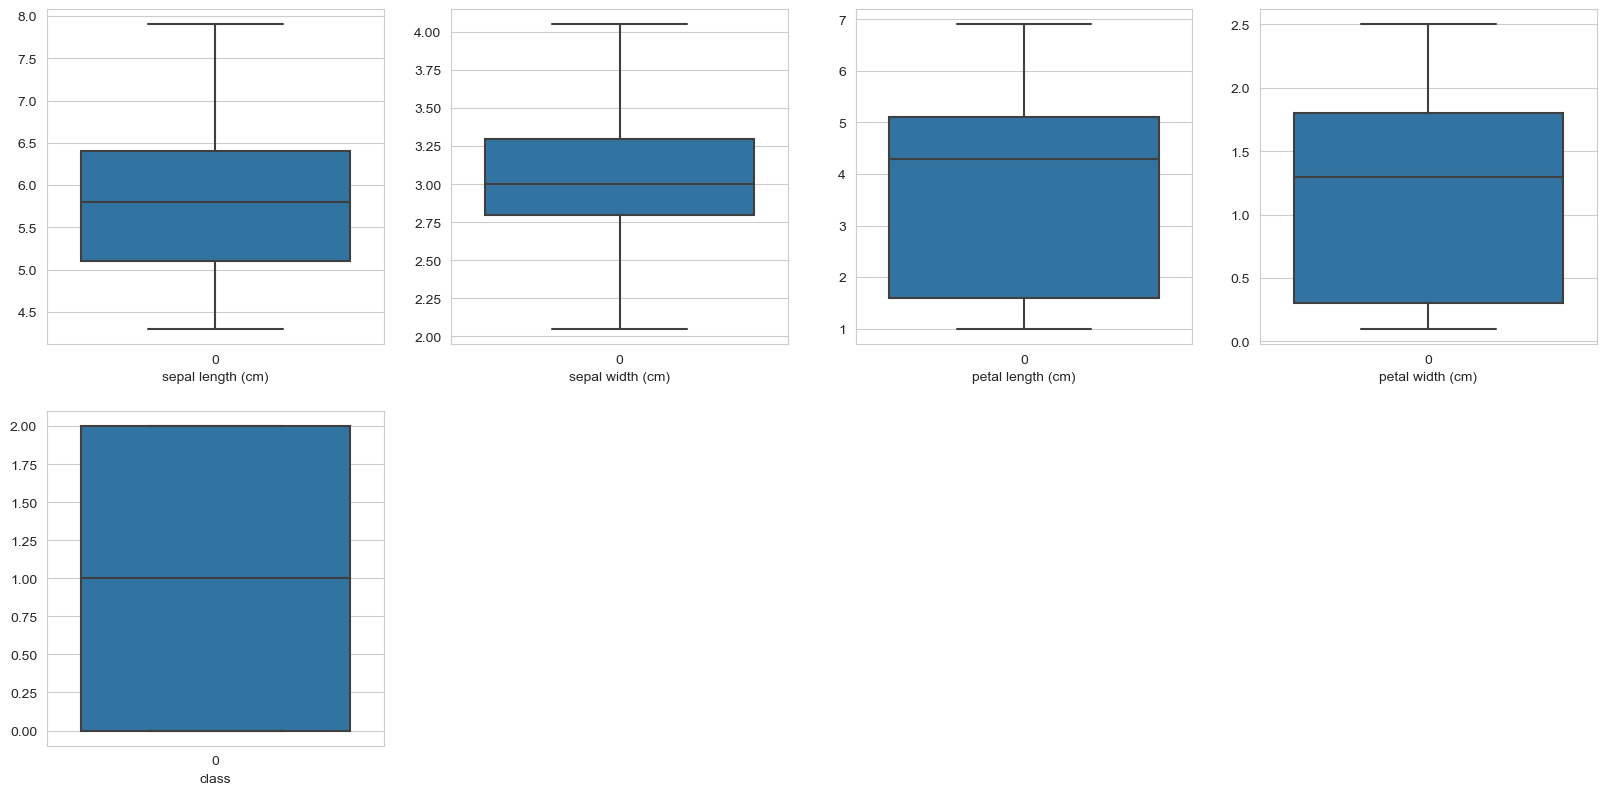

In [30]:
#box plot after outlier treatment
fig = plt.figure(figsize=(20,20))
counter = 0

for col in df.select_dtypes(include="number").columns:
    fig.add_subplot(4,4,counter+1)
    sns.boxplot(data=df[col])
    plt.xlabel(col)
    counter = counter + 1

In [31]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,2.0
145,6.3,2.5,5.0,1.9,2.0
146,6.5,3.0,5.2,2.0,2.0
147,6.2,3.4,5.4,2.3,2.0


In the Iris dataset doesn't require encoding of categorical columns because there are no categorical columns in the dataset. The target variable, representing the species of iris flowers, is already encoded as numerical values (0, 1, 2) corresponding to the three species (Setosa, Versicolor, Virginica).

### Feature Scaling


In [32]:
from sklearn.preprocessing import MinMaxScaler

# Create a scaler object
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df[col_name])

# Convert scaled data to DataFrame
scaled_df = pd.DataFrame(df_scaled, columns=col_name)

df[col_name] = scaled_df

df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,0.222222,0.725,0.067797,0.041667,0.0
1,0.166667,0.475,0.067797,0.041667,0.0
2,0.111111,0.575,0.050847,0.041667,0.0
3,0.083333,0.525,0.084746,0.041667,0.0
4,0.194444,0.775,0.067797,0.041667,0.0
...,...,...,...,...,...
144,0.666667,0.475,0.711864,0.916667,2.0
145,0.555556,0.225,0.677966,0.750000,2.0
146,0.611111,0.475,0.711864,0.791667,2.0
147,0.527778,0.675,0.745763,0.916667,2.0


### Model Building


In [33]:
x=df.drop('class',axis=1)

In [34]:
x

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.725,0.067797,0.041667
1,0.166667,0.475,0.067797,0.041667
2,0.111111,0.575,0.050847,0.041667
3,0.083333,0.525,0.084746,0.041667
4,0.194444,0.775,0.067797,0.041667
...,...,...,...,...
144,0.666667,0.475,0.711864,0.916667
145,0.555556,0.225,0.677966,0.750000
146,0.611111,0.475,0.711864,0.791667
147,0.527778,0.675,0.745763,0.916667


## 1.K-Means Clustering

### Elbow Plot
If there are many clusters, then it is difficult to find out the optimal value of K using the scatter plot. In this case we can use elbow plot to find K.

In [35]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,10):
    km = KMeans(i)
    km.fit(x)
    wcss.append(km.inertia_)
np.array(wcss)


array([42.82278937, 13.23831412,  7.84776214,  6.26554177,  5.09858599,
        4.43657433,  3.90638405,  3.51197752,  3.1227108 ])

WCSS represents the sum of squared distances between each point and the centroid of its assigned cluster. 'wcss' will contain the WCSS values for each k from 1 to 9.

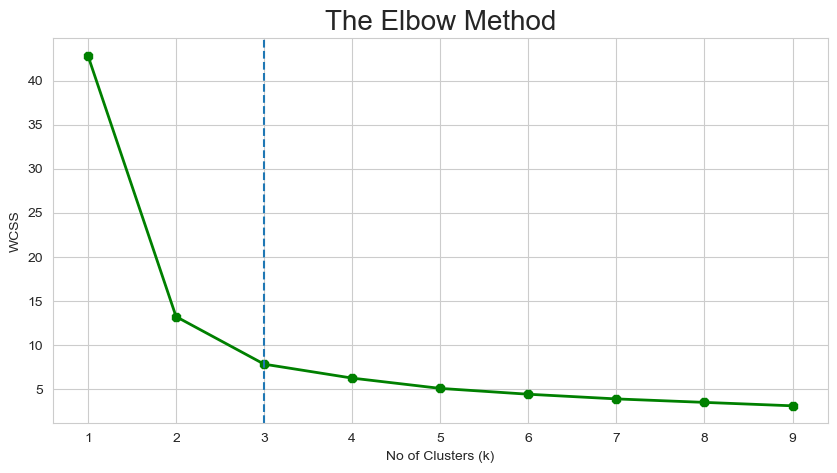

In [36]:
fig, ax = plt.subplots(figsize=(10,5))
ax = plt.plot(range(1,10),wcss,linewidth = 2, color = 'green',marker = '8')
plt.axvline(x=3,ls='--')
plt.ylabel('WCSS')
plt.xlabel('No of Clusters (k)')
plt.title('The Elbow Method', fontsize = 20)
plt.show()

We can see that K=3 from the Elbow plot.

In [37]:
km=KMeans(n_clusters=3)
km.fit(x)

KMeans(n_clusters=3)

In [38]:
y_pred=km.predict(x)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0])

In [39]:
x['cluster']=y_pred
x

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,0.222222,0.725,0.067797,0.041667,1
1,0.166667,0.475,0.067797,0.041667,1
2,0.111111,0.575,0.050847,0.041667,1
3,0.083333,0.525,0.084746,0.041667,1
4,0.194444,0.775,0.067797,0.041667,1
...,...,...,...,...,...
144,0.666667,0.475,0.711864,0.916667,2
145,0.555556,0.225,0.677966,0.750000,0
146,0.611111,0.475,0.711864,0.791667,2
147,0.527778,0.675,0.745763,0.916667,2


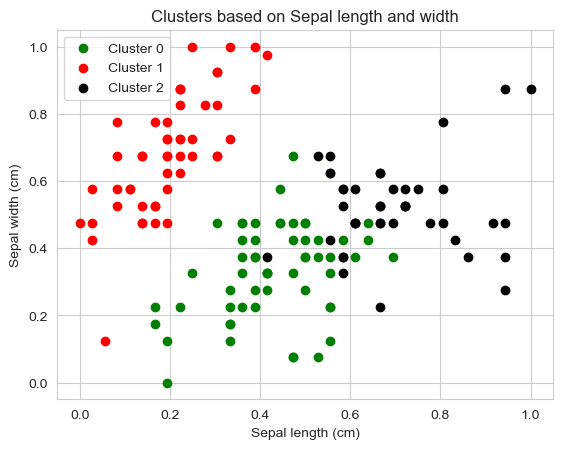

In [40]:
# Assuming 'cluster' is the column name containing cluster labels
df1 = x[x['cluster'] == 0]
df2 =x[x['cluster'] == 1]
df3 =x[x['cluster'] == 2]

plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color='green', label='Cluster 0')
plt.scatter(df2['sepal length (cm)'], df2['sepal width (cm)'], color='red', label='Cluster 1')
plt.scatter(df3['sepal length (cm)'], df3['sepal width (cm)'], color='black', label='Cluster 2')

plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.title('Clusters based on Sepal length and width')
plt.legend()
plt.show()

In [41]:
#find out the centroids in each cluster
km.cluster_centers_

array([[0.44166667, 0.34458333, 0.57372881, 0.54583333],
       [0.19611111, 0.6835    , 0.07830508, 0.06083333],
       [0.70726496, 0.51602564, 0.79704476, 0.82478632]])

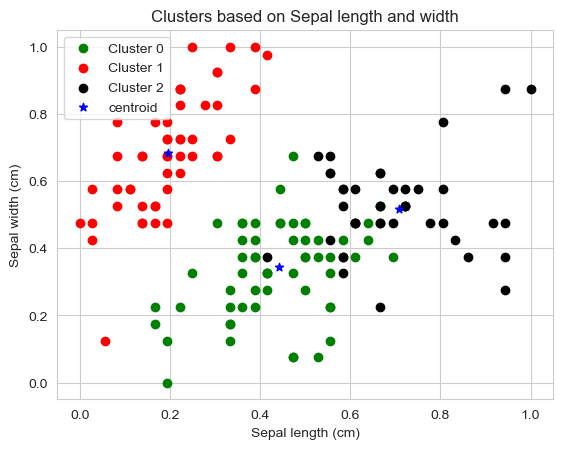

In [42]:
#scatter plot with centroids
df1 = x[x['cluster'] == 0]
df2 =x[x['cluster'] == 1]
df3 =x[x['cluster'] == 2]

plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color='green', label='Cluster 0')
plt.scatter(df2['sepal length (cm)'], df2['sepal width (cm)'], color='red', label='Cluster 1')
plt.scatter(df3['sepal length (cm)'], df3['sepal width (cm)'], color='black', label='Cluster 2')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='blue',marker='*',label='centroid')

plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.title('Clusters based on Sepal length and width')
plt.legend()
plt.show()

###  Model Evaluation

####  Silhouette Analysis
We can use the silhouette score to evaluate the quality of clustering. The silhouette score measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation). A higher silhouette score indicates better clustering.

In [43]:
from sklearn.metrics import silhouette_score
s= []
k_rng=range(2,11)
for k in k_rng:
    km=KMeans(n_clusters=k)
    km_pred=km.fit_predict(x)
    s.append(silhouette_score(x, km_pred))

s

[0.6254330033872404,
 0.7869598731011616,
 0.6200348614561401,
 0.4947208600624273,
 0.36576676397507973,
 0.36420808782505604,
 0.3697037387283229,
 0.3551949183808907,
 0.3492909638971793]

Text(0.5, 1.0, 'Silhouette Score vs. Number of Clusters')

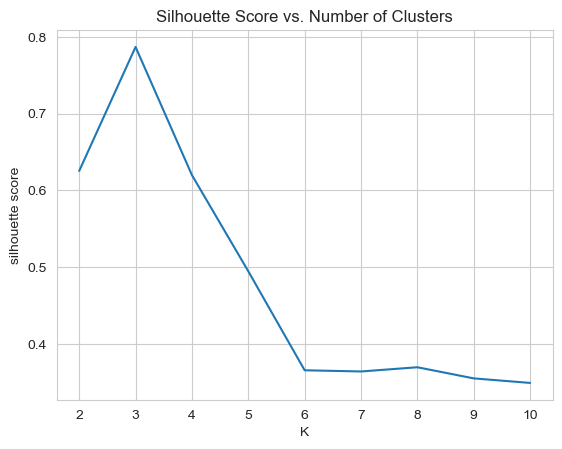

In [44]:
plt.xlabel('K')
plt.ylabel('silhouette score')
plt.plot(k_rng,s)
plt.title('Silhouette Score vs. Number of Clusters')

Highest Silhouette Score: Look for the value of k (number of clusters) that corresponds to the highest silhouette score on the plot. This value indicates the optimal number of clusters according to the silhouette score metric.

Overall Trend: Evaluate the overall trend of the silhouette scores as k increases. Typically, silhouette scores closer to 1 indicate better clustering, while scores closer to 0 or negative values suggest overlapping or poorly defined clusterd.

In [45]:
optimalkmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 4)
y_kmeansbest= optimalkmeans.fit_predict(x)

In [46]:
silhouette_score_kmeans=silhouette_score(x, y_kmeansbest)
silhouette_score_kmeans

0.7869598731011616

## 2.Hierarchical Clustering

In [47]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt


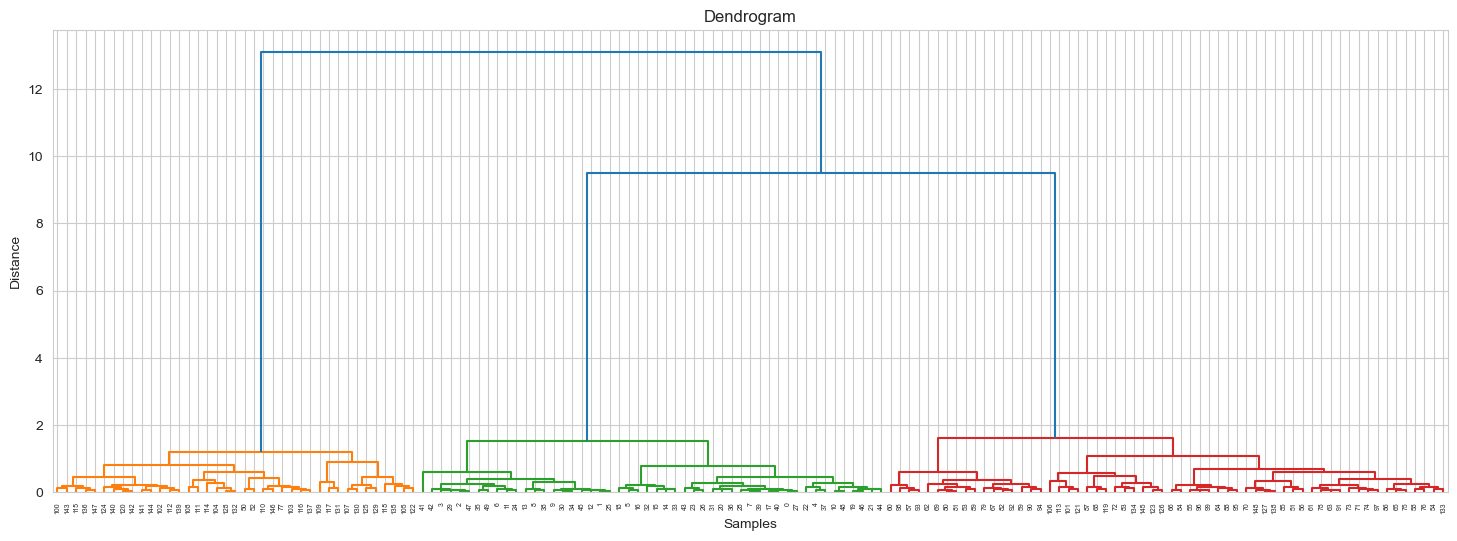

In [48]:
# Dendrogram plot
plt.figure(figsize=(18, 6))
# Calculate linkage using Ward's method and create the dendrogram
dendro = shc.dendrogram(shc.linkage(x, method="ward"))
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

### To Choose the Number of Clusters in Hierarchical Clustering
To get the number of clusters for hierarchical clustering, we make use of Dendrogram.

The vertical axis of the dendrogram represents the distance or dissimilarity between clusters. More the distance of the vertical lines in the dendrogram, more the distance between those clusters.

we can set a threshold distance and draw a horizontal line.

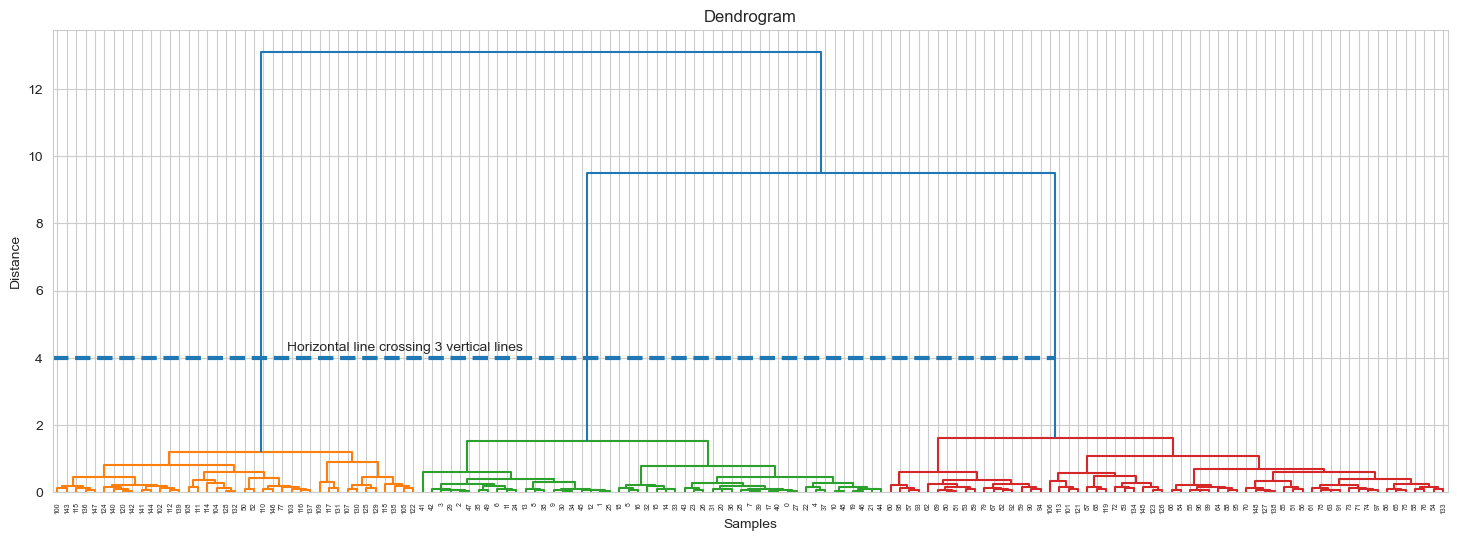

In [49]:
plt.figure(figsize=(18, 6))
dendro = shc.dendrogram(shc.linkage(x, method="ward"))
plt.hlines(y=4,xmin=0,xmax=1070,lw=3,linestyles='--')
plt.text(x=250,y=4.2,s='Horizontal line crossing 3 vertical lines')
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

Determining the threshold value for drawing the horizontal line in the dendrogram involves finding a balance between creating a sufficient number of clusters to capture meaningful patterns in the data and avoiding too many clusters that may result in overfitting or lack of interpretability.

Inspect the dendrogram visually and look for significant jumps or gaps in the vertical lines. These jumps indicate larger dissimilarities between clusters and can serve as natural breakpoints for cutting the dendrogram. This point can be chosen as the threshold value for drawing the horizontal line.

The number of clusters will be the number of vertical lines intersected by the line drawn using the threshold.

In [50]:
#build the model
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, metric = 'euclidean', linkage = 'ward')
hc_pred = hc.fit_predict(x)
hc_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0], dtype=int64)

In [51]:
x['cluster']=hc_pred
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,0.222222,0.725,0.067797,0.041667,2
1,0.166667,0.475,0.067797,0.041667,2
2,0.111111,0.575,0.050847,0.041667,2
3,0.083333,0.525,0.084746,0.041667,2
4,0.194444,0.775,0.067797,0.041667,2


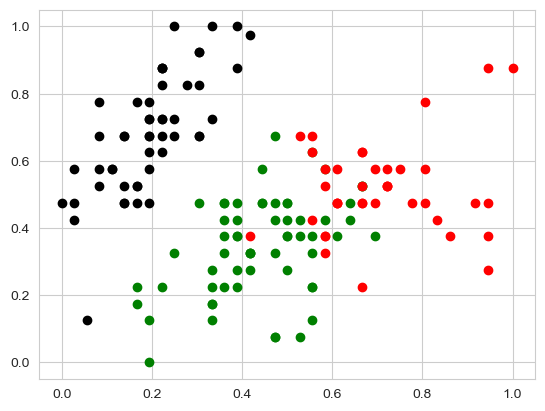

In [52]:
# Assuming 'cluster' is the column name containing cluster labels
df1 = x[x['cluster'] == 0]
df2 =x[x['cluster'] == 1]
df3 =x[x['cluster'] == 2]

plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color='green', label='Cluster 0')
plt.scatter(df2['sepal length (cm)'], df2['sepal width (cm)'], color='red', label='Cluster 1')
plt.scatter(df3['sepal length (cm)'], df3['sepal width (cm)'], color='black', label='Cluster 2')

### EvaluationModel Evaluation

#### Silhouette Analysis


In [53]:
sa=[]
k_rng=range(2,11)

for k in k_rng:
    hc=AgglomerativeClustering(n_clusters=k)
    hc_pred=hc.fit_predict(x)
    sa.append(silhouette_score(x, hc_pred))
sa

[0.6980501936213074,
 0.7646901054818738,
 0.6026622983620812,
 0.46629217306168785,
 0.3675324018691196,
 0.36108308772878384,
 0.36517792654267167,
 0.35115387710978563,
 0.3321970449608637]

Text(0.5, 1.0, 'Silhouette Score vs. Number of Clusters')

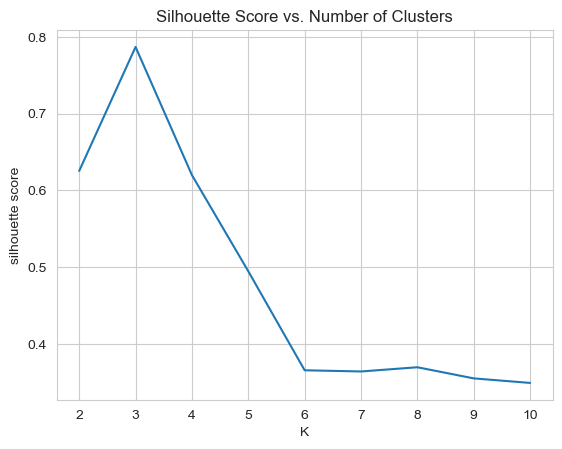

In [54]:
plt.xlabel('K')
plt.ylabel('silhouette score')
plt.plot(k_rng,s)
plt.title('Silhouette Score vs. Number of Clusters')

In [55]:
# Perform Agglomerative Clustering
optimal_agglomerative = AgglomerativeClustering(n_clusters=3)
y_agglomerative = optimal_agglomerative.fit_predict(x)


In [56]:
# Calculate the silhouette score for the clustering result
silhouette_score_agglomerative = silhouette_score(x, y_agglomerative)
silhouette_score_agglomerative

0.7646901054818738

In [57]:
# Create a DataFrame to display the silhouette scores in a table
silhouette_scores = pd.DataFrame({
    'Algorithm': ['K-Means', 'Agglomerative Clustering'],
    'Silhouette Score (k=3)': [silhouette_score_kmeans, silhouette_score_agglomerative]
})

silhouette_scores

,Algorithm,Silhouette Score (k=3)
0,K-Means,0.78696
1,Agglomerative Clustering,0.76469


### Conclusion:

#### K-Means: 
K-Means is a popular clustering algorithm that partitions data into 'k' distinct clusters based on similarity. It works by iteratively assigning data points to the nearest cluster centroid and updating the centroids until convergence. In this context, with a silhouette score of 0.786980 for k=3, K-Means demonstrates strong clustering performance, indicating clear separation between clusters.

#### Agglomerative Clustering: 
Agglomerative Clustering is a hierarchical clustering algorithm that starts with each data point as its cluster and merges them based on their similarity until a stopping criterion is met. It forms a dendrogram representing the hierarchical structure of the clusters. In this case, it achieves a silhouette score of 0.763989 for k=3, suggesting effective clustering with meaningful cluster formations.